## Bike Sales EDA

In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

In [24]:
# loading the data
df = pd.read_csv('data/sales.csv', parse_dates=['Date'])

### Data at a glance

In [29]:
df.head(2)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950


In [30]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,48275.000000,48275.000000,48275.000000,48275.000000,48275.000000,48275.000000,48275.000000,48275.000000,48275.000000
mean,15.614417,2014.571724,36.170792,14.918674,11.794552,25.047374,149.786929,166.584920,316.371849
std,8.808628,1.115733,11.007055,8.685807,12.404727,23.529555,171.161906,211.934818,330.738529
min,1.000000,2013.000000,17.000000,1.000000,2.000000,5.000000,-25.000000,2.000000,4.000000
25%,8.000000,2014.000000,28.000000,7.000000,3.000000,8.000000,31.000000,38.000000,81.000000
50%,16.000000,2014.000000,35.000000,15.000000,8.000000,22.000000,78.000000,87.000000,176.000000
75%,23.000000,2016.000000,44.000000,22.000000,13.000000,35.000000,227.000000,216.000000,485.000000
max,31.000000,2016.000000,87.000000,32.000000,59.000000,159.000000,2214.000000,1350.000000,3564.000000


In [27]:
df.shape

(48275, 18)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48275 entries, 0 to 48274
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              48275 non-null  object
 1   Day               48275 non-null  int64 
 2   Month             48275 non-null  object
 3   Year              48275 non-null  int64 
 4   Customer_Age      48275 non-null  int64 
 5   Age_Group         48275 non-null  object
 6   Customer_Gender   48275 non-null  object
 7   Country           48275 non-null  object
 8   State             48275 non-null  object
 9   Product_Category  48275 non-null  object
 10  Sub_Category      48275 non-null  object
 11  Product           48275 non-null  object
 12  Order_Quantity    48275 non-null  int64 
 13  Unit_Cost         48275 non-null  int64 
 14  Unit_Price        48275 non-null  int64 
 15  Profit            48275 non-null  int64 
 16  Cost              48275 non-null  int64 
 17  Revenue     

### Numerical Analysis and Visualization

Analyze the Unit_Cost column

In [31]:
df_unit_cost = df['Unit_Cost'].describe()
df_unit_cost

count    48275.000000
mean        11.794552
std         12.404727
min          2.000000
25%          3.000000
50%          8.000000
75%         13.000000
max         59.000000
Name: Unit_Cost, dtype: float64

In [32]:
df['Unit_Cost'].mean()

11.794552045572242

In [33]:
df['Unit_Cost'].median()

8.0

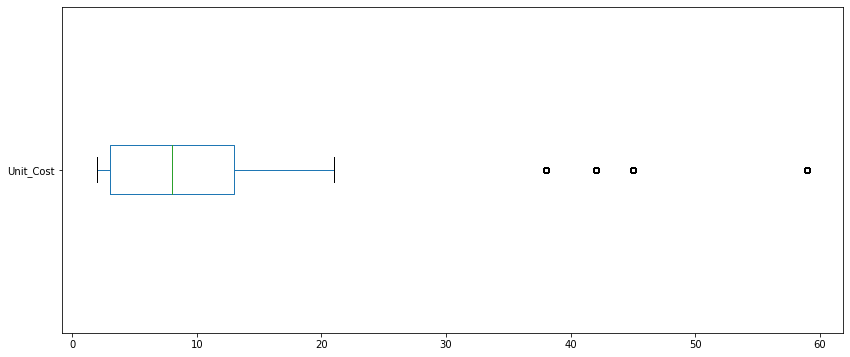

In [34]:
df['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))